**FELIX  KPSK-JKUAT-2-42**

**one a**

In [ ]:
import numpy as np

x = np.array([[12, 5, 2, 4],
              [7, 6, 8, 8],
              [1, 6, 7, 7]])

# i) array([[12, 5, 2, 4],
#          [7, 6, 8, 8],
#          [1, 6, 7, 7]])
array_i = x

# ii) array([[12, 2],
#           [7, 8],
#           [1, 7]])
array_ii = x[:, [0, 2]]

# iii) array([[7, 8],
#            [1, 7]])
array_iii = x[1:, [0, 2]]

print("Array i:\n", array_i)
print("\nArray ii:\n", array_ii)
print("\nArray iii:\n", array_iii)

Array i:
 [[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]

Array ii:
 [[12  2]
 [ 7  8]
 [ 1  7]]

Array iii:
 [[7 8]
 [1 7]]


**one b** a

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data from the table
data = {'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
        'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
        'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
        'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]}

df = pd.DataFrame(data)

# Features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy (R-squared) of the model
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R-squared):", accuracy)

Accuracy (R-squared): -19.009359227182006


**one b b**

In [ ]:
# New data for prediction
new_data = pd.DataFrame({'TV': [165.5], 'Radio': [20.0], 'Newspaper': [35.4]})

# Predict the sales
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 21.704129845197023


**2 a**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset (replace 'wine_dataset.csv' with the actual path)
from sklearn.datasets import load_wine
# Load the dataset (replace 'wine_dataset.csv' with the actual path)
wine_data = load_wine()
# Convert the Bunch object to a pandas DataFrame
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)




**2b**

**2c**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from io import string
csv-data="""
item identifier

SyntaxError: unterminated triple-quoted string literal (detected at line 4) (<ipython-input-1-0f749d6753ce>, line 3)

In [ ]:
# Create and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**2d**

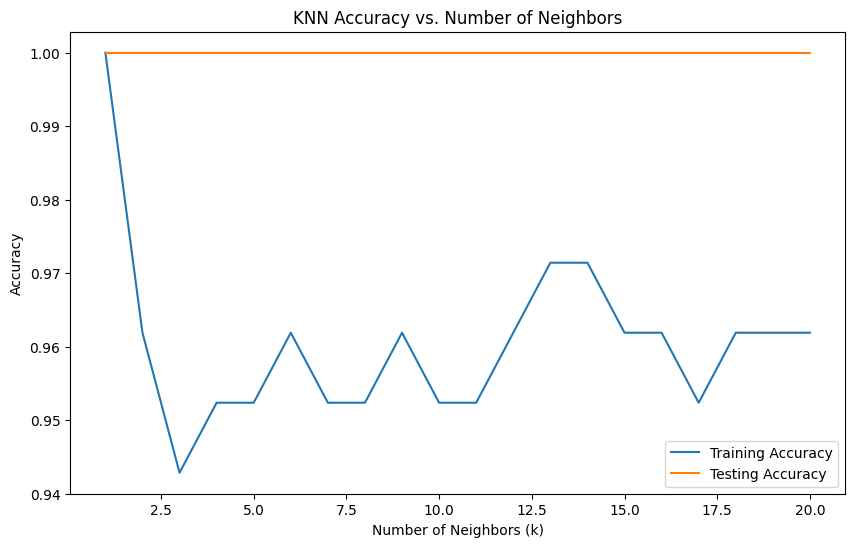

Best number of neigbors (k): 1


In [ ]:
train_accuracies = []
test_accuracies = []
neighbors = range(1, 21)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy')
plt.plot(neighbors, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

best_k = neighbors[test_accuracies.index(max(test_accuracies))]
print("Best number of neigbors (k):", best_k)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2  # OpenCV for image manipulation
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # For better visualization
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data=pd.read_csv('internet_usage.csv')
data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [ ]:
DATA_DIR = 'Animal_Dataset' # Replace with the actual path to your dataset
IMG_SIZE = 64 # Adjust as needed
labels = ['Cat', 'Dog'] # Replace with your class labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

def load_and_preprocess_data(data_dir):
    images = []
    image_labels = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = label_encoder.transform([label])[0]





In [ ]:
data.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [ ]:
im

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Define the K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Output the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9600000000000002
Standard Deviation of Accuracy: 0.024944382578492935


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (using Iris dataset for demonstration)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Initialize classifier
classifier = RandomForestClassifier(random_state=42)

# Perform 5 x 2 cross-validation
accuracies = []

for i in range(5):  # Repeat the process 5 times
    # Randomly split into 50% training and 50% testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)

    # Train the model on the training set
    classifier.fit(X_train, y_train)

    # Test the model on the testing set
    y_pred = classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Iteration {i + 1} Accuracy: {accuracy:.2f}")

# Output average and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

Iteration 1 Accuracy: 0.95
Iteration 2 Accuracy: 0.95
Iteration 3 Accuracy: 0.95
Iteration 4 Accuracy: 0.95
Iteration 5 Accuracy: 0.93
Mean Accuracy: 0.94
Standard Deviation of Accuracy: 0.01


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (using Iris dataset for demonstration)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Initialize classifier
classifier = RandomForestClassifier(random_state=42)

# Perform 5 x 2 cross-validation
accuracies = []

for i in range(5):  # Repeat the process 5 times
    # Randomly split into 50% training and 50% testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)

    # Train the model on the training set
    classifier.fit(X_train, y_train)

    # Test the model on the testing set
    y_pred = classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Iteration {i + 1} Accuracy: {accuracy:.2f}")

# Output average and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

Iteration 1 Accuracy: 0.95
Iteration 2 Accuracy: 0.95
Iteration 3 Accuracy: 0.95
Iteration 4 Accuracy: 0.95
Iteration 5 Accuracy: 0.93
Mean Accuracy: 0.94
Standard Deviation of Accuracy: 0.01


Confusion Matrix:
 [[2 0]
 [0 1]]


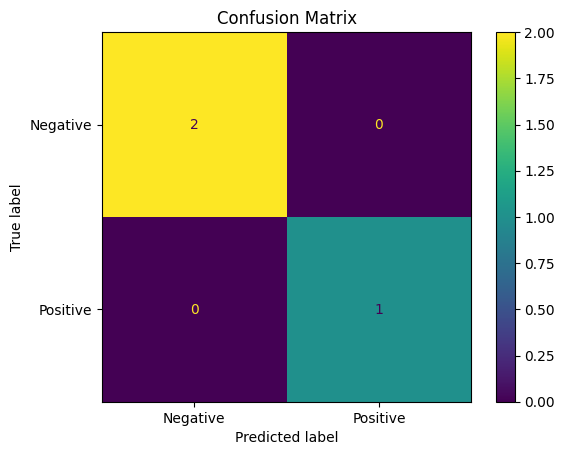

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt  # Import for displaying the plot

# Example data: Binary classification
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])  # Labels (0 for negative, 1 for positive)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative", "Positive"])
disp.plot()
plt.title("Confusion Matrix") # Add a title to the plot
plt.show()

Confusion Matrix:
 [[1 0]
 [1 1]]


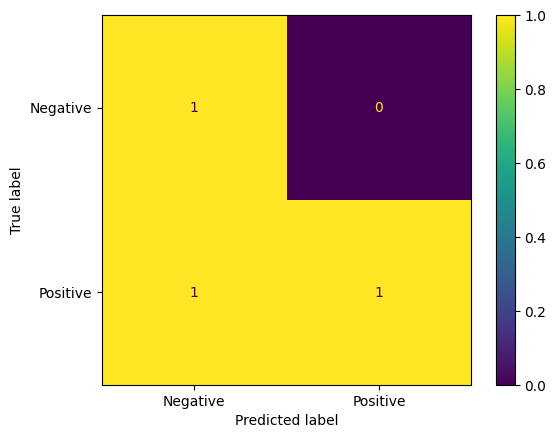


Accuracy: 0.67
Precision: 1.00
Recall: 0.50

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report

# Example data: Binary classification
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Labels (0 for negative, 1 for positive)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
import matplotlib.pyplot as plt
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

Confusion Matrix:
 [[1 0]
 [1 1]]


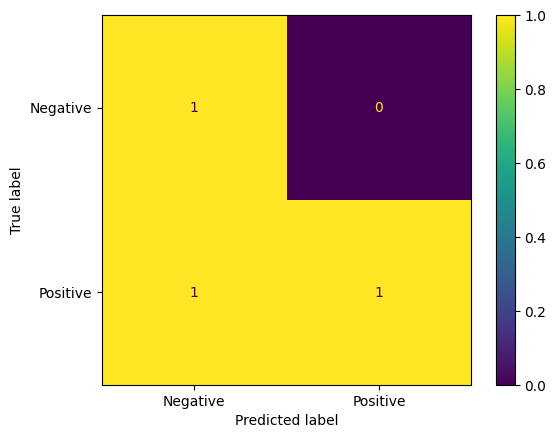


Accuracy: 0.67
Precision: 1.00
Recall: 0.50

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report

# Example data: Binary classification
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Labels (0 for negative, 1 for positive)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
import matplotlib.pyplot as plt
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

In [ ]:
dit_card_clean_3.csv")import pandas as pd
data = pd.read_csv("cre

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


In [ ]:
# 1. Check for missing values in each column:
print(data.isnull().sum())

# 2. Get a summary of missing values:
print(data.isnull().any().any())  # True if any missing values exist
print(data.isnull().any())  # Shows which columns have missing values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
others                        0
university                    0
dtype: int64
False
ID                   

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


In [ ]:
# Drop the specified columns
data_cleaned = data.drop(columns=['ID', 'EDUCATION_CAT'])

# Now 'data_cleaned' contains your dataset without the dropped columns

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True


In [ ]:
# 3. Feature selection (example - using all numerical features for now)
X = data_cleaned[numerical_features]
y = data_cleaned['default payment next month']

# 4. Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding
data = pd.concat([data, encoded_df], axis=1)

# Label Encoding
pay_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in pay_features:
    encoder = LabelEncoder()



In [ ]:
data.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_0,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,798fc410-45c1,20000,24,2,2,-1,-1,-2,-2,3913,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8a8c8f3b-8eb4,120000,26,-1,2,0,0,0,2,2682,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,85698822-43f5,90000,34,0,0,0,0,0,0,29239,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0737c11b-be42,50000,37,0,0,0,0,0,0,46990,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3b7f77cc-dbc0,50000,57,-1,0,-1,0,0,0,8617,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Now apply Label Encoding and One-Hot Encoding separately to X_train and X_test

In [ ]:
data.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_0,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,798fc410-45c1,20000,24,2,2,-1,-1,-2,-2,3913,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,8a8c8f3b-8eb4,120000,26,-1,2,0,0,0,2,2682,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,85698822-43f5,90000,34,0,0,0,0,0,0,29239,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0737c11b-be42,50000,37,0,0,0,0,0,0,46990,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3b7f77cc-dbc0,50000,57,-1,0,-1,0,0,0,8617,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 4. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Model Fitting (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [ ]:
import pandas as pd
data=pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21112, 20)
Shape of X_test: (5279, 20)
Shape of y_train: (21112,)
Shape of y_test: (5279,)


In [ ]:
# 1. Import the desired model
from sklearn.linear_model import LinearRegression  # Example: Linear Regression

# 2. Create an instance of the model
model = LinearRegression()

# 3. Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Now 'y_pred' contains the predictions for the testing data

In [ ]:
# This part would typically involve reading from a file (CSV, Excel, etc.)
# or loading from a dataset library (like scikit-learn).
# Since the image doesn't show the data loading, we'll represent it conceptually.

# Example if you had a CSV file named 'your_data.csv':
# import pandas as pd
# df = pd.read_csv('your_data.csv')

# If your data is already in a pandas DataFrame named 'df', you can skip this.
print("# Load the data (replace with your actual data loading)")

# Load the data (replace with your actual data loading)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data (replace with your actual data loading)
# Assuming your data is in a pandas DataFrame called 'df'
# and you have features (X) and a target variable (y) defined

# For demonstration purposes, let's create a sample DataFrame
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['target']

# Change the data to a dataframe (if needed)
# In this case, 'df' is already a DataFrame

# Split the dataset 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Standardize the dataset
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Base estimator
base_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Bagging classifier
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=30,
    max_samples=0.63,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train the model
bagging_clf.fit(X_scaled_train, y_train)

# Evaluate the model on accuracy
y_pred = bagging_clf.predict(X_scaled_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show the classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

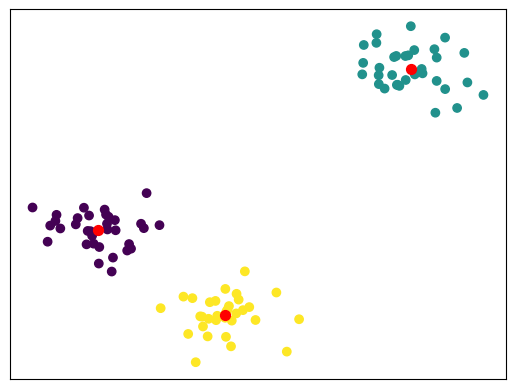

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
x,y=make_blobs(random_state=1)
model=KMeans(n_clusters=3)
model.fit(x)
y_means =model.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_means)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='red',s=50)
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
iris=load_iris()
x=iris.data
y=iris.target
model=KMeans(n_clusters=3)
model.fit(x)
y_means =model.predict(x)

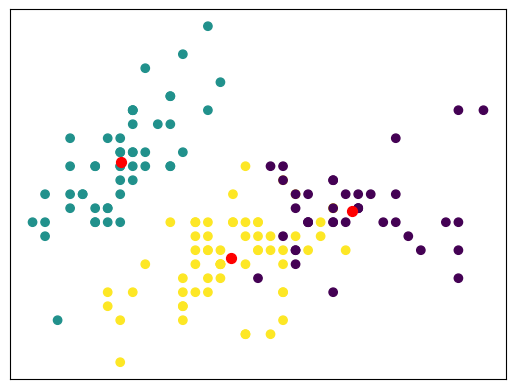

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y_means)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='red',s=50)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
x,y=make_blobs(random_state=1)
model=AgglomerativeClustering(n_clusters=3)
model.fit(x)
Ass=model.fit_predict(x)

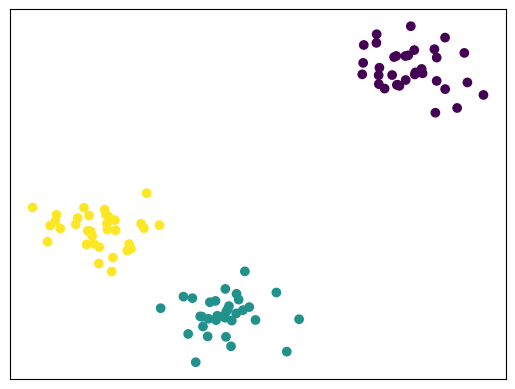

In [ ]:
plt.scatter(x[:,0],x[:,1],c=Ass)
plt.xticks([])
plt.yticks([])
plt.show()

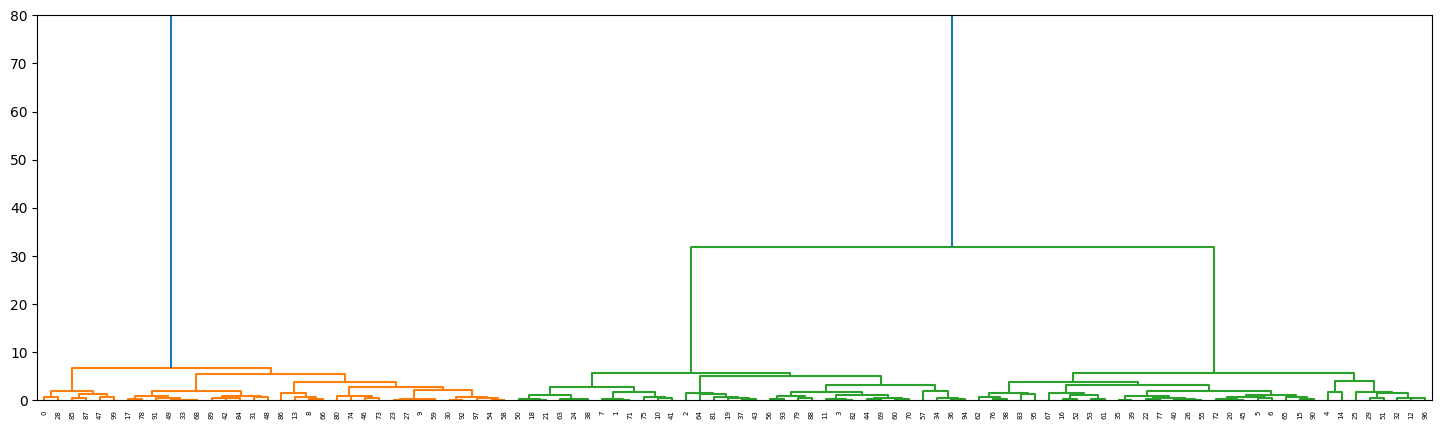

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import linkage
linkage_array=ward(x)
fig,ax=plt.subplots(figsize=(18,5))
dendrogram(linkage_array)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 80)
plt.show()

class membership:


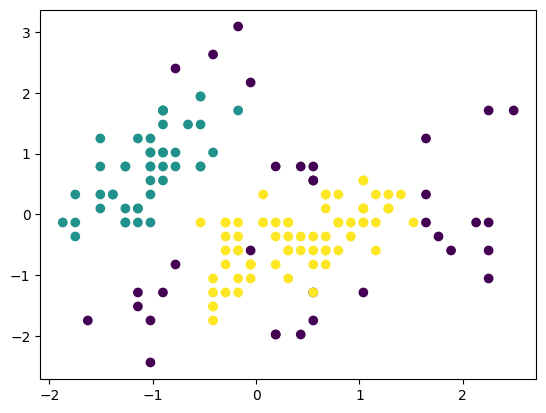

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=iris.data
x_sc=sc.fit_transform(x)
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(x_sc)
print('class membership:'),model.fit_predict(x_sc)
plt.scatter(x_sc[:,0],x_sc[:,1],c=model.fit_predict(x_sc))
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# --- 1. Data Acquisition (Illustrative - Replace with your actual data loading) ---
# Assuming you have a CSV file named 'student_data.csv'
try:
    student_df = pd.read_csv('student_data.csv')
    print("Student data loaded successfully:")
    print(student_df.head())
except FileNotFoundError:
    print("Error: student_data.csv not found. Please ensure the file is in the correct directory.")
    student_df = pd.DataFrame() # Create an empty DataFrame to avoid errors later

if not student_df.empty:
    # --- 2. Data Exploration and Preprocessing ---

    print("\n--- Data Information ---")
    student_df.info()

    print("\n--- Descriptive Statistics ---")
    print(student_df.describe())

    # Handle Missing Values (Example - replace with your strategy)
    for col in student_df.columns:
        if student_df[col].isnull().any():
            print(f"\nMissing values in column: {col}")
            # Example imputation for numerical columns:
            if pd.api.types.is_numeric_dtype(student_df[col]):
                student_df[col].fillna(student_df[col].mean(), inplace=True)
            # Example imputation for categorical columns:
            else:
                student_df[col].fillna(student_df[col].mode()[0], inplace=True)

    # Encode Categorical Variables (Example - adapt to your categorical columns)
    categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                        'lunch', 'test preparation course']
    label_encoders = {}
    for col in categorical_cols:
        if col in student_df.columns:
            le = LabelEncoder()
            student_df[col] = le.fit_transform(student_df[col])
            label_encoders[col] = le
            print(f"Encoded column: {col}")

    # Feature Engineering (Example - create a 'total_score' if individual scores exist)
    score_cols = ['math score', 'reading score', 'writing score']
    if all(col in student_df.columns for col in score_cols):
        student_df['total_score'] = student_df[score_cols].sum(axis=1)
        print("\nCreated feature: total_score")

    # --- 3. Exploratory Data Analysis (EDA) ---

    print("\n--- Exploratory Data Analysis ---")

    # Univariate Analysis
    plt.figure(figsize=(10, 6))
    sns.histplot(student_df['math score'], kde=True)
    plt.title('Distribution of Math Scores')
    plt.show()

    sns.boxplot(y=student_df['reading score'])
    plt.title('Box Plot of Reading Scores')
    plt.show()

    # Bivariate Analysis
    sns.scatterplot(x='study time', y='writing score', data=student_df)
    plt.title('Study Time vs. Writing Score')
    plt.show()

    correlation_matrix = student_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Student Data')
    plt.show()

    # Group Analysis
    if 'race/ethnicity' in student_df.columns and 'math score' in student_df.columns:
        sns.boxplot(x='race/ethnicity', y='math score', data=student_df)
        plt.title('Math Scores by Race/Ethnicity')
        plt.show()

    # --- 4. Modeling and Analysis (Example: Academic Performance Prediction) ---

    print("\n--- Academic Performance Prediction (Example: Predicting 'pass/fail' based on total score) ---")

    if 'total_score' in student_df.columns:
        # Create a binary target variable (example: pass if total score >= a threshold)
        threshold = student_df['total_score'].median()
        student_df['passed'] = np.where(student_df['total_score'] >= threshold, 1, 0)

        X = student_df.drop(['passed'], axis=1, errors='ignore') # Drop 'passed' if it exists
        y = student_df['passed']

        # Select features for the model
        feature_cols_pred = ['math score', 'reading score', 'writing score', 'study time']
        X_pred = X[feature_cols_pred].fillna(X[feature_cols_pred].mean()) # Handle potential NaNs

        X_train, X_test, y_train, y_test = train_test_split(X_pred, y, test_size=0.2, random_state=42)

        # Scale numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train a Logistic Regression model
        model = LogisticRegression(random_state=42)
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Logistic Regression Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

    # --- 4. Modeling and Analysis (Example: Student Clustering based on scores) ---

    print("\n--- Student Clustering (Example: Clustering based on test scores) ---")

    score_cols_cluster = ['math score', 'reading score', 'writing score']
    if all(col in student_df.columns for col in score_cols_cluster):
        X_cluster = student_df[score_cols_cluster].fillna(student_df[score_cols_cluster].mean())

        # Scale the data for clustering
        scaler_cluster = StandardScaler()
        X_scaled_cluster = scaler_cluster.fit_transform(X_cluster)

        # Apply K-Means clustering
        n_clusters = 3 # You might need to determine the optimal number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        student_df['cluster'] = kmeans.fit_predict(X_scaled_cluster)

        print(f"\nClustered students into {n_clusters} groups.")
        print(student_df[['math score', 'reading score', 'writing score', 'cluster']].head())

        # Visualize the clusters (using PCA for dimensionality reduction to 2D)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled_cluster)
        pca_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
        pca_df['cluster'] = student_df['cluster']

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df, palette='viridis')
        plt.title('Student Clusters Visualized (PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

    print("\n--- End of Student Pattern Analysis Example ---")

else:
    print("\nNo student data loaded. Please provide a 'student_data.csv' file.")

Error: student_data.csv not found. Please ensure the file is in the correct directory.

No student data loaded. Please provide a 'student_data.csv' file.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn. manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dataset import load_wine


In [ ]:
data = pd.read_csv('wine.csv')

In [ ]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Simulated Dataset
data = {
    'Recency': [30, 200, 60, 20, 90],
    'Frequency': [12, 5, 8, 15, 7],
    'Monetary': [500, 300, 400, 1000, 350]
}
df = pd.DataFrame(data)

# Scaling the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)

print(df)

   Recency  Frequency  Monetary  Segment
0       30         12       500        2
1      200          5       300        0
2       60          8       400        2
3       20         15      1000        1
4       90          7       350        2


Please ensure the 'retail_data.csv' file is in the correct directory.
Dataset Preview:
   Recency  Frequency  Monetary  Segment
0       30         12       500        2
1      200          5       300        0
2       60          8       400        2
3       20         15      1000        1
4       90          7       350        2

Customer Segments Summary:
         Recency  Frequency     Monetary
Segment                                 
0          200.0        5.0   300.000000
1           20.0       15.0  1000.000000
2           60.0        9.0   416.666667


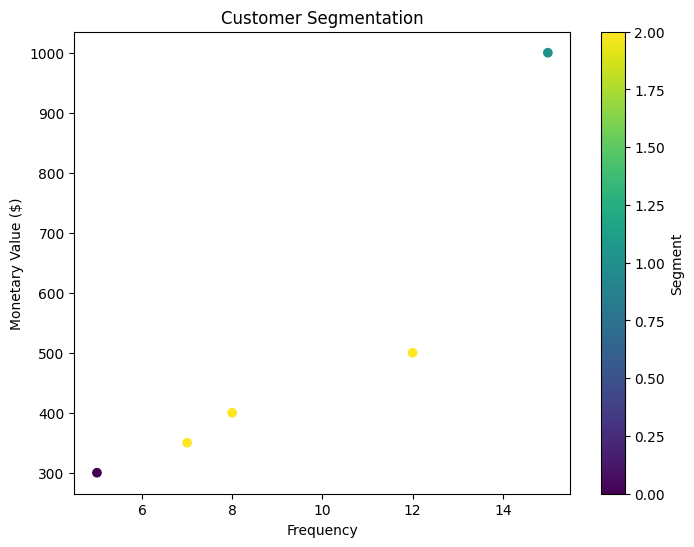


Segmented customer data saved to 'segmented_customers.csv'.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load Dataset
# Replace 'retail_data.csv' with the actual file path
try:
    df = pd.read_csv('retail_data.csv') # Assumes columns: CustomerID, Recency, Frequency, Monetary
except FileNotFoundError:
    print("Please ensure the 'retail_data.csv' file is in the correct directory.")
    exit()

# Step 2: Inspect the Dataset
print("Dataset Preview:")
print(df.head())

# Step 3: Data Preprocessing
# Select relevant features for segmentation
columns = ['Recency', 'Frequency', 'Monetary'] # Ensure column names match your dataset
data = df[columns].copy()

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True) # Replace missing values with the column mean

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Apply K-Means clustering
n_clusters = 3 # Number of customer segments
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for better convergence
df['Segment'] = kmeans.fit_predict(scaled_data)

# Step 6: Analyze Customer Segments
print("\nCustomer Segments Summary:")
print(df.groupby('Segment')[columns].mean())

# Step 7: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(df['Frequency'], df['Monetary'], c=df['Segment'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value ($)')
plt.title('Customer Segmentation')
plt.colorbar(label='Segment')
plt.show()

# Step 8: Save Results to File
output_file = 'segmented_customers.csv'
df.to_csv(output_file, index=False)
print(f"\nSegmented customer data saved to '{output_file}'.")

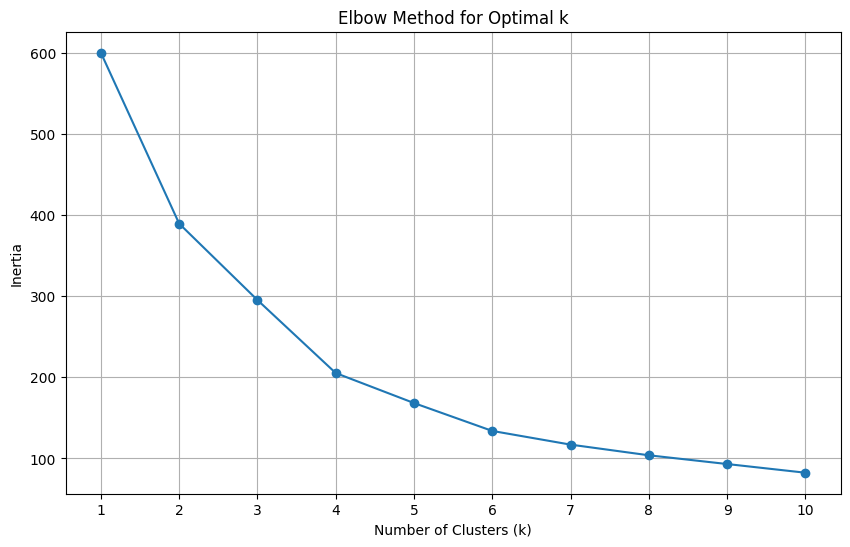

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


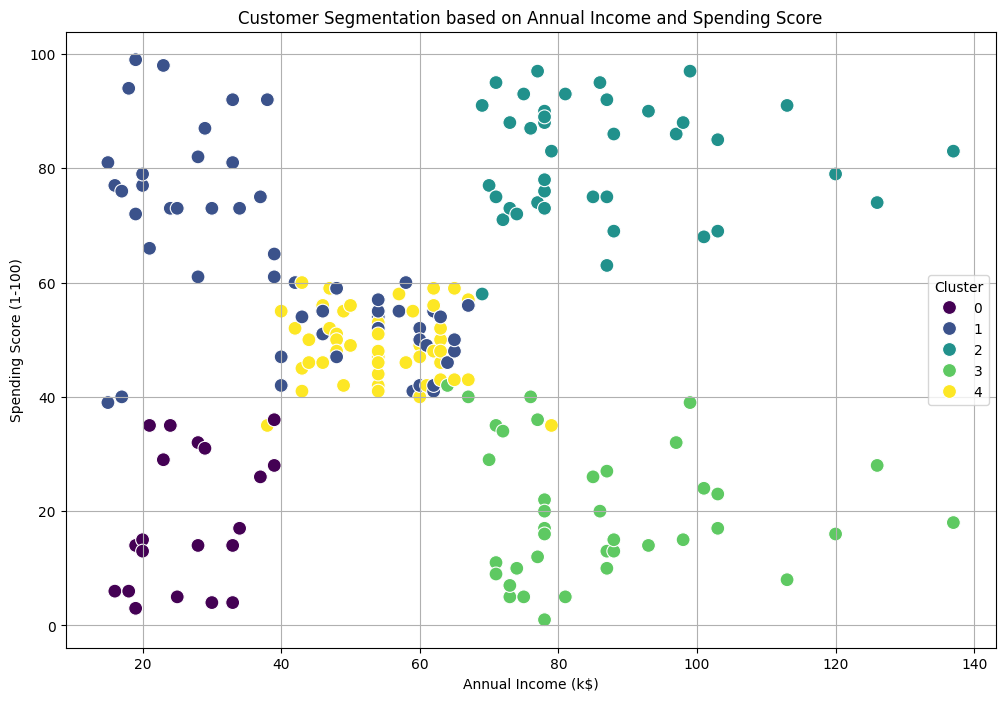


Customer segmentation with K-Means clustering completed.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Data Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters (let's assume k=5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Visualize the clusters (for 2D projections)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nCustomer segmentation with K-Means clustering completed.")

In [ ]:
print("Dataset preview:")
print(df.head)

Dataset preview:
<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          1  
1         

Data loaded successfully!

Missing Values before handling:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Missing Values after handling:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


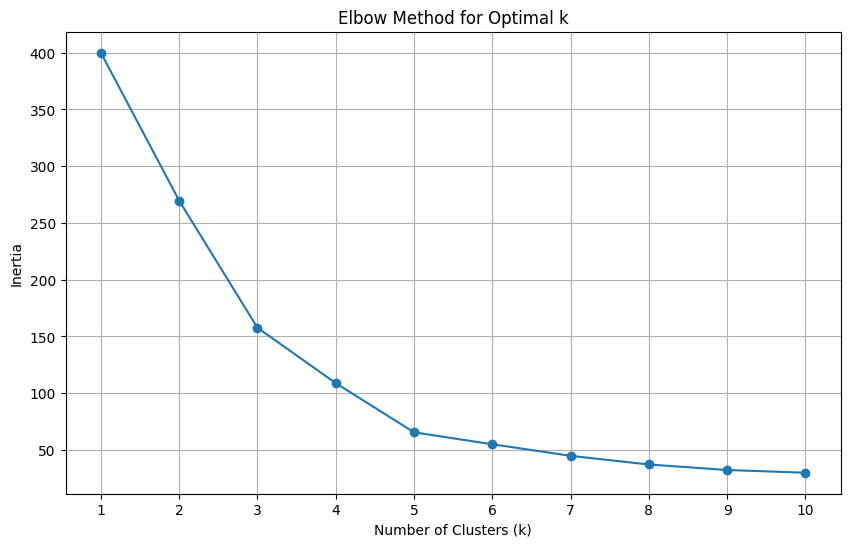


Cluster Analysis:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 87.000000               18.631579
1                 86.538462               82.128205
2                 44.154472               49.829268


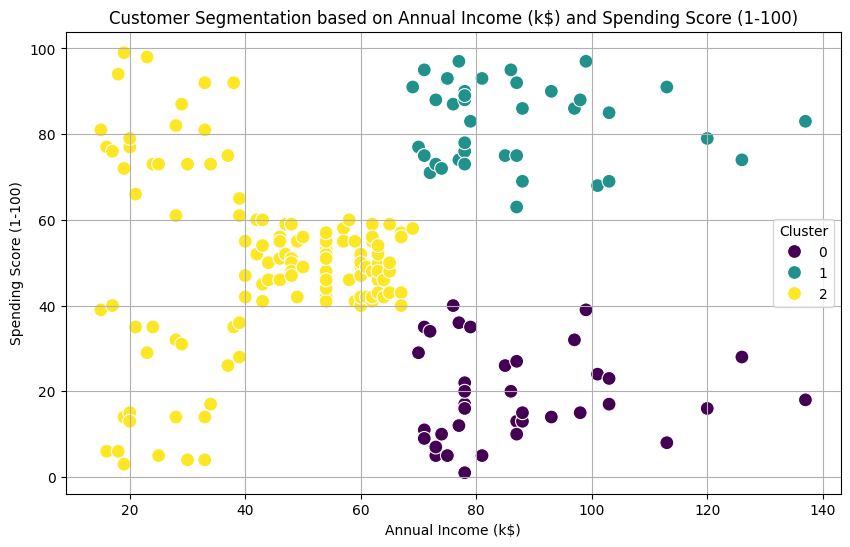


Cluster Counts:
Cluster
0     38
1     39
2    123
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Your Data ---
# Replace 'your_data.csv' with the actual path to your dataset
try:
    df = pd.read_csv("Mall_Customers.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'your_data.csv' not found. Please check the file path.")
    exit()

# --- 2. Select Features for Segmentation ---
# Choose the columns that are relevant for clustering your customers.
# Common features include: 'Recency', 'Frequency', 'Monetary', 'Age', 'Income', etc.
# Adjust this list based on your dataset.
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features_for_clustering].copy()

# --- 3. Handle Missing Values (if any) ---
# Check for missing values
print("\nMissing Values before handling:")
print(X.isnull().sum())

# Decide how to handle missing values:
# Option 1: Impute with the mean (if appropriate)
# X.fillna(X.mean(), inplace=True)

# Option 2: Impute with the median (if data has outliers)
# X.fillna(X.median(), inplace=True)

# Option 3: Remove rows with missing values (if the number is small)
# X.dropna(inplace=True)

# Print missing values after handling
print("\nMissing Values after handling:")
print(X.isnull().sum())

# --- 4. Scale the Data ---
# Scaling is important for K-Means as it's distance-based.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame (optional, for easier inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

# --- 5. Determine the Optimal Number of Clusters (Elbow Method) ---
inertia = []
k_range = range(1, 11)  # Try a range of cluster numbers
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal number of clusters (let's say n_clusters = 3 for this example)
n_clusters = 3

# --- 6. Apply K-Means Clustering ---
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 7. Analyze the Clusters ---
print("\nCluster Analysis:")
print(df.groupby('Cluster')[features_for_clustering].mean())

# --- 8. Visualize the Clusters (for 2D data) ---
if len(features_for_clustering) == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=features_for_clustering[0], y=features_for_clustering[1], hue='Cluster', palette='viridis', s=100)
    plt.title(f'Customer Segmentation based on {features_for_clustering[0]} and {features_for_clustering[1]}')
    plt.xlabel(features_for_clustering[0])
    plt.ylabel(features_for_clustering[1])
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
elif len(features_for_clustering) > 2:
    print("\nVisualizing clusters for more than 2 features is complex. Consider using dimensionality reduction techniques like PCA for visualization.")

# --- 9. Further Analysis and Interpretation ---
print("\nCluster Counts:")
print(df['Cluster'].value_counts().sort_index())

# You can now further analyze each cluster based on other attributes in your dataset
# to understand the characteristics of each customer segment.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(10,)), # Input layer with 10 features
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Output layer for binary classification (0 or 1)
    ]
)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate some dummy data for demonstration
import numpy as np
X_train = np.random.rand(1000, 10)
y_train = np.random.randint(0, 2, 1000)
X_val = np.random.rand(200, 10)
y_val = np.random.randint(0, 2, 200)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_val)
print("Predictions (first 5):")
print(predictions[:5])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4857 - loss: 0.6959 - val_accuracy: 0.4850 - val_loss: 0.6949
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4899 - loss: 0.6940 - val_accuracy: 0.4600 - val_loss: 0.6955
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5470 - loss: 0.6874 - val_accuracy: 0.4950 - val_loss: 0.6961
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5574 - loss: 0.6871 - val_accuracy: 0.4650 - val_loss: 0.7024
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5578 - loss: 0.6851 - val_accuracy: 0.5150 - val_loss: 0.6969
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 0.6813 - val_accuracy: 0.4200 - val_loss: 0.7050
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5477 - loss: 0.6841 - val_accuracy: 0.4700 - val_loss: 0.7015
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5285 - loss: 0.6889 - val_accuracy: 0.4750 - val_loss: 0.6996
Ep

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ------------------- Model Definition -------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'), # First fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digits) and softmax activation
])

# ------------------- Model Compilation -------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ------------------- Model Training --------------------
epochs = 10  # Number of times the entire training dataset will be passed through the network
batch_size = 32 # Number of samples per gradient update

model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

# ------------------- Model Evaluation -------------------
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8664 - loss: 0.4763 - val_accuracy: 0.9548 - val_loss: 0.1582
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9596 - loss: 0.1364 - val_accuracy: 0.9666 - val_loss: 0.1144
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9730 - loss: 0.0899 - val_accuracy: 0.9697 - val_loss: 0.1004
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9807 - loss: 0.0677 - val_accuracy: 0.9742 - val_loss: 0.0901
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9863 - loss: 0.0479 - val_accuracy: 0.9735 - val_loss: 0.0942
Test loss: 0.0812
Test accuracy: 0.9750


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ------------------- Model Definition -------------------
model = Sequential([
    Flatten(input_shape=(28,28)),  # Flatten the 28x28 images into a 784-dimensional vector
    Dense(128, activation='relu'), # First fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 digits) and softmax activation
])

# ------------------- Model Compilation -------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ------------------- Model Training --------------------
epochs = 10  # Number of times the entire training dataset will be passed through the network
batch_size = 32 # Number of samples per gradient update

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# ------------------- Model Evaluation -------------------
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8668 - loss: 0.4740 - val_accuracy: 0.9562 - val_loss: 0.1541
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9618 - loss: 0.1338 - val_accuracy: 0.9663 - val_loss: 0.1174
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9739 - loss: 0.0902 - val_accuracy: 0.9696 - val_loss: 0.1012
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0625 - val_accuracy: 0.9724 - val_loss: 0.0934
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9858 - loss: 0.0477 - val_accuracy: 0.9725 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9888 - loss: 0.0376 - val_accuracy: 0.9696 - val_loss: 0.1060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9726 - val_loss: 0.0967
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9932 - loss: 0.024